# Homework 4

By Yanhao Miao

## Question 1 Exploratory Data Analysis

In [25]:
import pandas as pd
import zipfile
import numpy as np
import matplotlib.pyplot as plt

In [8]:
zf = zipfile.ZipFile('/Users/miaoyanhao/Desktop/input/compustat.zip') # get the zip file
# open the csv without unzipping, and choose 
rawdf = pd.read_csv(zf.open('compustat.csv'))

In [9]:
rawdf.head()

,gvkey,datadate,fyearq,fqtr,indfmt,consol,popsrc,datafmt,cusip,curcdq,datacqtr,datafqtr,cshoq,saleq,costat,prccq,sic
0,1000,19660331,1966,1,INDL,C,D,STD,000032102,USD,1966Q1,1966Q1,0.219,NaN,I,NaN,3089.0
1,1000,19660630,1966,2,INDL,C,D,STD,000032102,USD,1966Q2,1966Q2,0.219,NaN,I,NaN,3089.0
2,1000,19660930,1966,3,INDL,C,D,STD,000032102,USD,1966Q3,1966Q3,0.219,NaN,I,NaN,3089.0
3,1000,19661231,1966,4,INDL,C,D,STD,000032102,USD,1966Q4,1966Q4,0.219,4.032,I,NaN,3089.0
4,1000,19670331,1967,1,INDL,C,D,STD,000032102,USD,1967Q1,1967Q1,0.277,NaN,I,NaN,3089.0


In [10]:
# select the var names we are interested in
df = rawdf[["sic","datacqtr","cusip","cshoq","saleq","prccq"]]
df.head()

,sic,datacqtr,cusip,cshoq,saleq,prccq
0,3089.0,1966Q1,000032102,0.219,NaN,NaN
1,3089.0,1966Q2,000032102,0.219,NaN,NaN
2,3089.0,1966Q3,000032102,0.219,NaN,NaN
3,3089.0,1966Q4,000032102,0.219,4.032,NaN
4,3089.0,1967Q1,000032102,0.277,NaN,NaN


2 For saleq and market cap, compute the following:
Time series mean
Time Series standard deviation
Time Series count of missing values
Time Series ratio of missing values
Aggregate the result in a dataframe

In [ ]:
# compute market cap = prccq * cshoq
df["marketcap"] = df["cshoq"] * df["prccq"]

In [12]:
saleq_mean = df['saleq'].dropna().mean()
marketcap_mean = df['marketcap'].dropna().mean()
saleq_std = df['saleq'].dropna().std()
marketcap_std = df['marketcap'].dropna().std()
saleq_nan = df['saleq'].isna().sum()
marketcap_nan = df['marketcap'].isna().sum()
saleq_nan_ratio = saleq_nan/len(df['saleq'])
marketcap_nan_ratio = marketcap_nan/len(df['marketcap'])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [17]:
# Aggregate the result in a dataframe
res = pd.DataFrame(data = [[saleq_mean, marketcap_mean], [saleq_std, marketcap_std],[saleq_nan, marketcap_nan],
                   [saleq_nan_ratio, marketcap_nan_ratio]], index = 
                   ["mean","std","number of missing","ratio of missing"], columns = ["saleq", "marketcap"])
print(res)

,saleq,marketcap
mean,445.150664,2057.473104
std,2679.706576,13202.197457
number of missing,269498.000000,468276.000000
ratio of missing,0.148787,0.258530


Answer the following questions:
Before computing any value, what kinds of descriptive analysis would you do to check if there are outliers?
Implement some schemes to detect outliers.
Do you find some outliers? Could you think why? You can do some research using google.
What kinds of conclusion you can get from analyzing the table you get in 2? You can make some plots to illustrate.

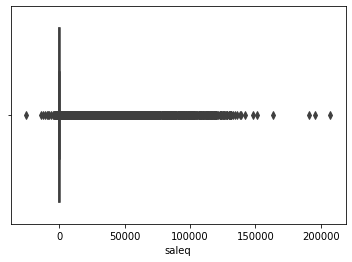

In [20]:
# 1. use box plot to detect outliers
import seaborn as sns
sns.boxplot(x = df['saleq'])

In [23]:
Q1=df['saleq'].quantile(0.25)
Q3=df['saleq'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_bound = Q1 - 1.5 * IQR
Upper_bound = Q3 + 1.5 * IQR
print(Lower_bound, Upper_bound)

3.21
130.53
127.32000000000001
-187.77 321.51


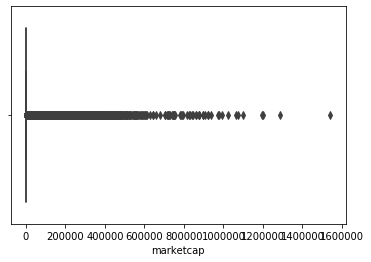

In [21]:
sns.boxplot(x = df['marketcap'])

In [24]:
Q1=df['marketcap'].quantile(0.25)
Q3=df['marketcap'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_bound = Q1 - 1.5 * IQR
Upper_bound = Q3 + 1.5 * IQR
print(Lower_bound, Upper_bound)

20.007009
525.7137662499999
505.70675724999995
-738.5531268749999 1284.273902125


In [42]:
# 2. check the Z-score
from scipy import stats
saleq_df = pd.DataFrame(df['saleq'].dropna())
z = np.abs(stats.zscore(saleq_df))

# Any point outside of 3 standard deviations would be an outlier
threshold = 3
saleq_outliers = saleq_df[(z > threshold)]
saleq_outlier_ratio = saleq_outliers.shape[0] / saleq_df.shape[0]

marketcap_df = pd.DataFrame(df['marketcap'].dropna())
z = np.abs(stats.zscore(marketcap_df))

# Any point outside of 3 standard deviations would be an outlier
threshold = 3
marketcap_outliers = marketcap_df[(z > threshold)]
marketcap_outlier_ratio = marketcap_outliers.shape[0] / marketcap_df.shape[0]

print(saleq_outlier_ratio)
print(marketcap_outlier_ratio)

0.00979244403136332
0.009401179279878304


,saleq
3,4.032
7,5.363
11,29.840
12,7.095
13,10.683


## Question 2 Compute Industry Concentration

In [43]:
df["2dsic"] = df['sic'].astype('str').str[0:2]

df_HHI = pd.DataFrame(data = df, columns = ["2dsic", "datacqtr", "marketcap"]).dropna()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,2dsic,datacqtr,marketcap
18,30,1970Q3,26.202500
19,30,1970Q4,24.460000
20,30,1971Q1,34.193250
21,30,1971Q2,29.023500
22,30,1971Q3,16.256875
23,30,1971Q4,17.221250
24,30,1972Q1,16.768125
25,30,1972Q2,17.736000
26,30,1972Q3,15.534750
27,30,1972Q4,14.872750


In [44]:
df_HHI.head(10)

,2dsic,datacqtr,marketcap
18,30,1970Q3,26.202500
19,30,1970Q4,24.460000
20,30,1971Q1,34.193250
21,30,1971Q2,29.023500
22,30,1971Q3,16.256875
23,30,1971Q4,17.221250
24,30,1972Q1,16.768125
25,30,1972Q2,17.736000
26,30,1972Q3,15.534750
27,30,1972Q4,14.872750


In [51]:
# compute the industry market cap for every datacqtr
df_HHI["induscap"] = df_HHI.groupby(["2dsic","datacqtr"])["marketcap"].transform('sum')


In [52]:
df_HHI.head(30)

,2dsic,datacqtr,marketcap,induscap
18,30,1970Q3,26.202500,6289.293375
19,30,1970Q4,24.460000,8067.256308
20,30,1971Q1,34.193250,8700.795835
21,30,1971Q2,29.023500,9039.093803
22,30,1971Q3,16.256875,9224.606151
23,30,1971Q4,17.221250,9313.714730
24,30,1972Q1,16.768125,9879.501918
25,30,1972Q2,17.736000,9500.571881
26,30,1972Q3,15.534750,9374.259091
27,30,1972Q4,14.872750,9721.436585


,2dsic,datacqtr,marketcap_x,induscap,marketcap_y
0,30,1970Q3,26.202500,6289.293375,6289.293375
1,30,1970Q3,37.070500,6289.293375,6289.293375
2,30,1970Q3,30.904500,6289.293375,6289.293375
3,30,1970Q3,20.088250,6289.293375,6289.293375
4,30,1970Q3,8.574750,6289.293375,6289.293375
5,30,1970Q3,49.120000,6289.293375,6289.293375
6,30,1970Q3,57.204750,6289.293375,6289.293375
7,30,1970Q3,719.527500,6289.293375,6289.293375
8,30,1970Q3,75.073500,6289.293375,6289.293375
9,30,1970Q3,39.009375,6289.293375,6289.293375
